In [1]:
import warnings  # To handle warnings

# Ignore warnings for cleaner output
warnings.filterwarnings('ignore')

# Import necessary libraries
import pandas as pd  # For data manipulation and analysis
import numpy as np   # For numerical operations
import matplotlib.pyplot as plt  # For basic data visualization
import seaborn as sns  # For enhanced data visualization

# To display plots in the notebook
%matplotlib inline


In [2]:
# Importing the dataset 
path= "D:\Data Science\Machine Learning\Decision Tree\Dataset\Discount Offering.csv"
df=pd.read_csv(path)

In [3]:
df.head()

,REF_NO,children,age_band,status,occupation,occupation_partner,home_status,self_employed,self_employed_partner,year_last_moved,...,Investment Tax Saving Bond,Home Loan,Online Purchase Amount,Discount Offering,gender,region,Investment in Commudity,Investment in Equity,Investment in Derivative,Portfolio Balance
0,1,Zero,51-55,Partner,Manual Worker,Secretarial/Admin,Own Home,No,No,1972,...,19.99,0.00,0.00,1,Female,Wales,74.67,18.66,32.32,89.43
1,2,Zero,55-60,Single/Never Married,Retired,Retired,Own Home,No,No,1998,...,0.00,0.00,0.00,2,Female,North West,20.19,0.00,4.33,22.78
2,3,Zero,26-30,Single/Never Married,Professional,Other,Own Home,Yes,No,1996,...,0.00,3.49,0.00,2,Male,North,98.06,31.07,80.96,171.78
3,5,Zero,18-21,Single/Never Married,Professional,Manual Worker,Own Home,No,No,1997,...,0.00,0.00,0.00,2,Female,West Midlands,4.10,14.15,17.57,-41.70
4,6,Zero,45-50,Partner,Business Manager,Unknown,Own Home,No,No,1995,...,0.00,45.91,25.98,2,Female,Scotland,70.16,55.86,80.44,235.02


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10155 entries, 0 to 10154
Data columns (total 31 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   REF_NO                           10155 non-null  int64  
 1   children                         10155 non-null  object 
 2   age_band                         10155 non-null  object 
 3   status                           10155 non-null  object 
 4   occupation                       10155 non-null  object 
 5   occupation_partner               10155 non-null  object 
 6   home_status                      10155 non-null  object 
 7   self_employed                    10155 non-null  object 
 8   self_employed_partner            10155 non-null  object 
 9   year_last_moved                  10155 non-null  int64  
 10  TVarea                           10155 non-null  object 
 11  post_code                        10155 non-null  object 
 12  post_area         




---

**Observations:**

1. **Dataset Size:**
   - The dataset is sizable, comprising 10,155 rows and 31 columns.

2. **Column Types:**
   - There are 18 numerical columns and 13 object columns, reflecting a combination of numeric and categorical data.

3. **Memory Consumption:**
   - The overall memory usage exceeds 2.4 MB.

---




In [5]:
# Replace spaces with underscores in column names for consistency. 
df.columns = df.columns.str.replace(' ', '_')
df

,REF_NO,children,age_band,status,occupation,occupation_partner,home_status,self_employed,self_employed_partner,year_last_moved,...,Investment_Tax_Saving_Bond,Home_Loan,Online_Purchase_Amount,Discount_Offering,gender,region,Investment_in_Commudity,Investment_in_Equity,Investment_in_Derivative,Portfolio_Balance
0,1,Zero,51-55,Partner,Manual Worker,Secretarial/Admin,Own Home,No,No,1972,...,19.99,0.00,0.00,1,Female,Wales,74.67,18.66,32.32,89.43
1,2,Zero,55-60,Single/Never Married,Retired,Retired,Own Home,No,No,1998,...,0.00,0.00,0.00,2,Female,North West,20.19,0.00,4.33,22.78
2,3,Zero,26-30,Single/Never Married,Professional,Other,Own Home,Yes,No,1996,...,0.00,3.49,0.00,2,Male,North,98.06,31.07,80.96,171.78
3,5,Zero,18-21,Single/Never Married,Professional,Manual Worker,Own Home,No,No,1997,...,0.00,0.00,0.00,2,Female,West Midlands,4.10,14.15,17.57,-41.70
4,6,Zero,45-50,Partner,Business Manager,Unknown,Own Home,No,No,1995,...,0.00,45.91,25.98,2,Female,Scotland,70.16,55.86,80.44,235.02
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10150,11512,1,45-50,Partner,Secretarial/Admin,Manual Worker,Own Home,No,No,1972,...,4.49,0.00,0.00,2,Female,South East,7.29,3.50,9.57,10.23
10151,11513,Zero,45-50,Partner,Manual Worker,Manual Worker,Rent from Council/HA,No,No,1988,...,0.00,0.00,0.00,2,Female,South East,62.27,3.00,36.40,102.62
10152,11514,2,41-45,Partner,Housewife,Professional,Own Home,No,No,1992,...,0.00,0.00,0.00,2,Female,South East,52.77,0.00,14.07,76.18
10153,11516,Zero,51-55,Partner,Other,Manual Worker,Own Home,No,Yes,1970,...,0.00,7.98,0.00,2,Female,South East,7.20,2.99,1.66,4.79


In [6]:
# Drop the 'REF_NO' column as it appears to be an identifier with unique values for each row, providing no useful information
df.drop('REF_NO', axis=1, inplace=True)


In [7]:
# Map 'Zero' to 0 and '4+' to 4 for better numerical representation of the 'children' column
# Convert the 'children' column to int64 to ensure it's stored as integers
df['children'] = df['children'].replace({'Zero': 0, '4+': 4}).astype(int)
df

,children,age_band,status,occupation,occupation_partner,home_status,self_employed,self_employed_partner,year_last_moved,TVarea,...,Investment_Tax_Saving_Bond,Home_Loan,Online_Purchase_Amount,Discount_Offering,gender,region,Investment_in_Commudity,Investment_in_Equity,Investment_in_Derivative,Portfolio_Balance
0,0,51-55,Partner,Manual Worker,Secretarial/Admin,Own Home,No,No,1972,HTV,...,19.99,0.00,0.00,1,Female,Wales,74.67,18.66,32.32,89.43
1,0,55-60,Single/Never Married,Retired,Retired,Own Home,No,No,1998,Granada,...,0.00,0.00,0.00,2,Female,North West,20.19,0.00,4.33,22.78
2,0,26-30,Single/Never Married,Professional,Other,Own Home,Yes,No,1996,Tyne Tees,...,0.00,3.49,0.00,2,Male,North,98.06,31.07,80.96,171.78
3,0,18-21,Single/Never Married,Professional,Manual Worker,Own Home,No,No,1997,Central,...,0.00,0.00,0.00,2,Female,West Midlands,4.10,14.15,17.57,-41.70
4,0,45-50,Partner,Business Manager,Unknown,Own Home,No,No,1995,Scottish TV,...,0.00,45.91,25.98,2,Female,Scotland,70.16,55.86,80.44,235.02
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10150,1,45-50,Partner,Secretarial/Admin,Manual Worker,Own Home,No,No,1972,Carlton,...,4.49,0.00,0.00,2,Female,South East,7.29,3.50,9.57,10.23
10151,0,45-50,Partner,Manual Worker,Manual Worker,Rent from Council/HA,No,No,1988,Meridian,...,0.00,0.00,0.00,2,Female,South East,62.27,3.00,36.40,102.62
10152,2,41-45,Partner,Housewife,Professional,Own Home,No,No,1992,Central,...,0.00,0.00,0.00,2,Female,South East,52.77,0.00,14.07,76.18
10153,0,51-55,Partner,Other,Manual Worker,Own Home,No,Yes,1970,Carlton,...,0.00,7.98,0.00,2,Female,South East,7.20,2.99,1.66,4.79


In [8]:
# Checking unique values in the 'children' column to ensure the mapping and conversion were successful
df["children"].unique()


array([0, 1, 2, 3, 4])

In [9]:
# Checking the unique values of Age-band column 
df["age_band"].unique()

array(['51-55', '55-60', '26-30', '18-21', '45-50', '36-40', '61-65',
       '31-35', '41-45', '71+', '22-25', '65-70', 'Unknown'], dtype=object)

In [10]:
# Function to calculate average of range values in the 'age_band' column
def calculate_avg(value):
    if '+' in value:
        return int(value.replace('+', ''))
    elif '-' in value:
        start, end = value.split('-')
        return (int(start) + int(end)) / 2
    else:
        return None

# Apply the function to create a new column 'avg_age'
df['avg_age'] = df['age_band'].apply(calculate_avg)

# Fill missing values ('Unknown') with the median of non-null values in 'avg_age'
median_age = df[df['avg_age'].notnull()]['avg_age'].median()
df['avg_age'].fillna(median_age, inplace=True)


In [11]:
# Checking the avg_age column 
df["avg_age"].unique()

array([53. , 57.5, 28. , 19.5, 47.5, 38. , 63. , 33. , 43. , 71. , 23.5,
       67.5])

In [12]:
# Dropping thje age_band column 
df.drop('age_band', axis=1, inplace=True)
df

,children,status,occupation,occupation_partner,home_status,self_employed,self_employed_partner,year_last_moved,TVarea,post_code,...,Home_Loan,Online_Purchase_Amount,Discount_Offering,gender,region,Investment_in_Commudity,Investment_in_Equity,Investment_in_Derivative,Portfolio_Balance,avg_age
0,0,Partner,Manual Worker,Secretarial/Admin,Own Home,No,No,1972,HTV,NP4 9HS,...,0.00,0.00,1,Female,Wales,74.67,18.66,32.32,89.43,53.0
1,0,Single/Never Married,Retired,Retired,Own Home,No,No,1998,Granada,M41 0QH,...,0.00,0.00,2,Female,North West,20.19,0.00,4.33,22.78,57.5
2,0,Single/Never Married,Professional,Other,Own Home,Yes,No,1996,Tyne Tees,NE30 1JZ,...,3.49,0.00,2,Male,North,98.06,31.07,80.96,171.78,28.0
3,0,Single/Never Married,Professional,Manual Worker,Own Home,No,No,1997,Central,HR9 7RJ,...,0.00,0.00,2,Female,West Midlands,4.10,14.15,17.57,-41.70,19.5
4,0,Partner,Business Manager,Unknown,Own Home,No,No,1995,Scottish TV,KA10 7LS,...,45.91,25.98,2,Female,Scotland,70.16,55.86,80.44,235.02,47.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10150,1,Partner,Secretarial/Admin,Manual Worker,Own Home,No,No,1972,Carlton,SM4 5RF,...,0.00,0.00,2,Female,South East,7.29,3.50,9.57,10.23,47.5
10151,0,Partner,Manual Worker,Manual Worker,Rent from Council/HA,No,No,1988,Meridian,RG14 7PA,...,0.00,0.00,2,Female,South East,62.27,3.00,36.40,102.62,47.5
10152,2,Partner,Housewife,Professional,Own Home,No,No,1992,Central,OX15 0PU,...,0.00,0.00,2,Female,South East,52.77,0.00,14.07,76.18,43.0
10153,0,Partner,Other,Manual Worker,Own Home,No,Yes,1970,Carlton,CM15 0LU,...,7.98,0.00,2,Female,South East,7.20,2.99,1.66,4.79,53.0


In [13]:
# Let us deal with categorial columns 
df["status"].unique()

array(['Partner', 'Single/Never Married', 'Widowed', 'Divorced/Separated',
       'Unknown'], dtype=object)

In [14]:
# Replace 'Unknown' in the 'status' column with the mode (most frequent value)
df['status'] = df['status'].replace({'Unknown': df['status'].mode()[0]})

# Combine 'Single/Never Married', 'Widowed', and 'Divorced/Separated' into 'No_Partner' category
df['status'] = df['status'].apply(lambda x: 'No_Partner' if x in ['Single/Never Married', 'Widowed', 'Divorced/Separated'] else x)
df

,children,status,occupation,occupation_partner,home_status,self_employed,self_employed_partner,year_last_moved,TVarea,post_code,...,Home_Loan,Online_Purchase_Amount,Discount_Offering,gender,region,Investment_in_Commudity,Investment_in_Equity,Investment_in_Derivative,Portfolio_Balance,avg_age
0,0,Partner,Manual Worker,Secretarial/Admin,Own Home,No,No,1972,HTV,NP4 9HS,...,0.00,0.00,1,Female,Wales,74.67,18.66,32.32,89.43,53.0
1,0,No_Partner,Retired,Retired,Own Home,No,No,1998,Granada,M41 0QH,...,0.00,0.00,2,Female,North West,20.19,0.00,4.33,22.78,57.5
2,0,No_Partner,Professional,Other,Own Home,Yes,No,1996,Tyne Tees,NE30 1JZ,...,3.49,0.00,2,Male,North,98.06,31.07,80.96,171.78,28.0
3,0,No_Partner,Professional,Manual Worker,Own Home,No,No,1997,Central,HR9 7RJ,...,0.00,0.00,2,Female,West Midlands,4.10,14.15,17.57,-41.70,19.5
4,0,Partner,Business Manager,Unknown,Own Home,No,No,1995,Scottish TV,KA10 7LS,...,45.91,25.98,2,Female,Scotland,70.16,55.86,80.44,235.02,47.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10150,1,Partner,Secretarial/Admin,Manual Worker,Own Home,No,No,1972,Carlton,SM4 5RF,...,0.00,0.00,2,Female,South East,7.29,3.50,9.57,10.23,47.5
10151,0,Partner,Manual Worker,Manual Worker,Rent from Council/HA,No,No,1988,Meridian,RG14 7PA,...,0.00,0.00,2,Female,South East,62.27,3.00,36.40,102.62,47.5
10152,2,Partner,Housewife,Professional,Own Home,No,No,1992,Central,OX15 0PU,...,0.00,0.00,2,Female,South East,52.77,0.00,14.07,76.18,43.0
10153,0,Partner,Other,Manual Worker,Own Home,No,Yes,1970,Carlton,CM15 0LU,...,7.98,0.00,2,Female,South East,7.20,2.99,1.66,4.79,53.0


In [15]:
df["status"].unique()

array(['Partner', 'No_Partner'], dtype=object)

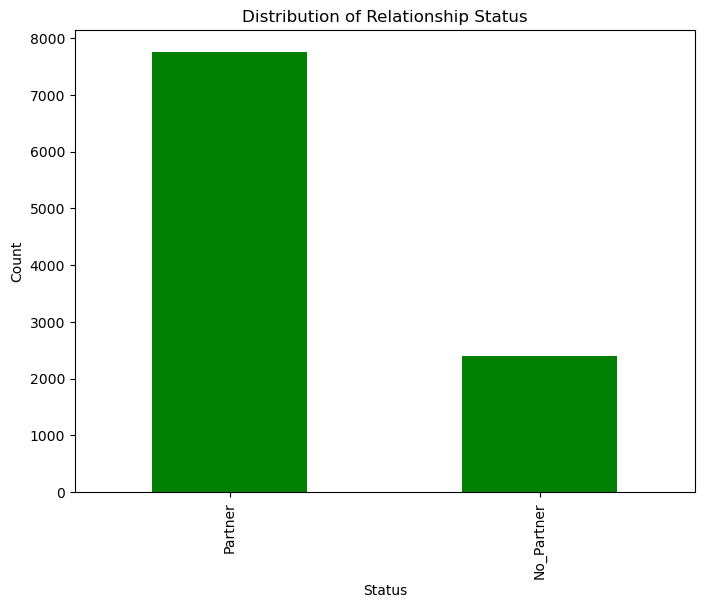

In [16]:
# Plot a bar chart for the distribution of relationship status
plt.figure(figsize=(8, 6))

# Count the occurrences of each category in the 'status' column
status_counts = df['status'].value_counts()

# Plot the bar chart
status_counts.plot(kind='bar', color='green')

# Set chart labels and title
plt.title("Distribution of Relationship Status")
plt.xlabel("Status")
plt.ylabel("Count")

# Display the plot
plt.show()


# There are more Commited people in our dataset 

In [17]:
# Dealing with occupation column 

df["occupation"].unique()

array(['Manual Worker', 'Retired', 'Professional', 'Business Manager',
       'Secretarial/Admin', 'Unknown', 'Housewife', 'Other', 'Student'],
      dtype=object)

In [18]:
# Replace 'Unknown' with overall mode of the 'occupation' column
overall_mode = df['occupation'].mode()[0]
df['occupation'] = df['occupation'].replace({'Unknown': overall_mode})

# Map 'Professional' category
professional_occupations = ['Manual Worker', 'Professional', 'Business Manager', 'Secretarial/Admin']
df['occupation'] = df['occupation'].apply(lambda x: 'Professional' if x in professional_occupations else x)

# Map 'Non-Professional' category
non_professional_occupations = ['Retired', 'Housewife', 'Student']
df['occupation'] = df['occupation'].apply(lambda x: 'Non-Professional' if x in non_professional_occupations else x)

# Map 'Other' category
df['occupation'] = df['occupation'].apply(lambda x: 'Other' if x not in ['Professional', 'Non-Professional'] else x)


In [19]:
df["occupation"].unique()

array(['Professional', 'Non-Professional', 'Other'], dtype=object)

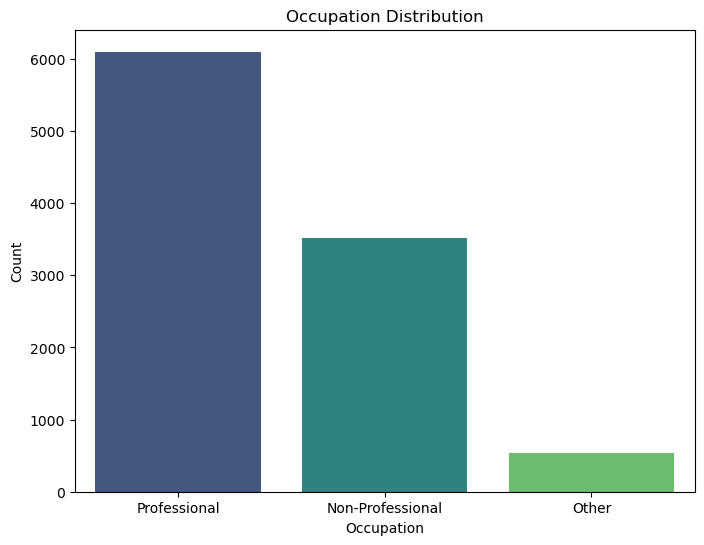

In [20]:
# Plot a bar graph for the 'occupation' column
plt.figure(figsize=(8, 6))
sns.countplot(x='occupation', data=df, palette='viridis')
plt.title('Occupation Distribution')
plt.xlabel('Occupation')
plt.ylabel('Count')
plt.show()


# There are more profssional people with gauranteed income in the dataset 

In [21]:
df["occupation_partner"].unique()

array(['Secretarial/Admin', 'Retired', 'Other', 'Manual Worker',
       'Unknown', 'Professional', 'Business Manager', 'Housewife',
       'Student'], dtype=object)

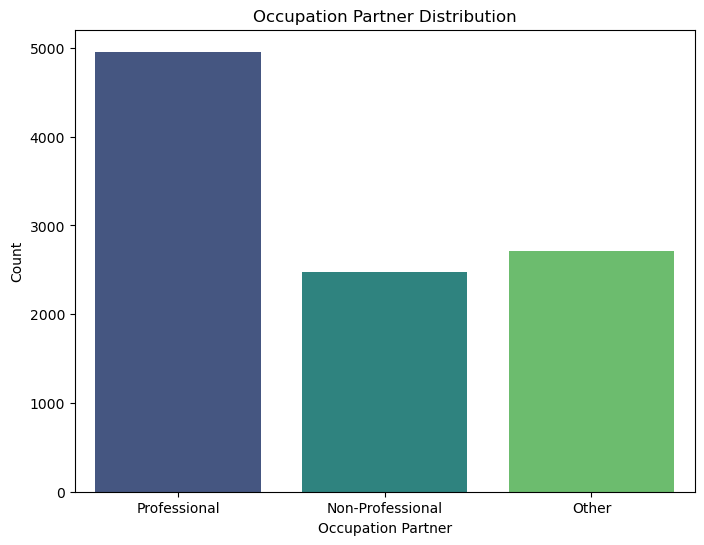

In [22]:
# Replace 'Unknown' with overall mode of the 'occupation_partner' column
overall_partner_mode = df['occupation_partner'].mode()[0]
df['occupation_partner'] = df['occupation_partner'].replace({'Unknown': overall_partner_mode})

# Map 'Professional' category
professional_partner_occupations = ['Manual Worker', 'Professional', 'Business Manager', 'Secretarial/Admin']
df['occupation_partner'] = df['occupation_partner'].apply(lambda x: 'Professional' if x in professional_partner_occupations else x)

# Map 'Non-Professional' category
non_professional_partner_occupations = ['Retired', 'Housewife', 'Student']
df['occupation_partner'] = df['occupation_partner'].apply(lambda x: 'Non-Professional' if x in non_professional_partner_occupations else x)

# Map 'Other' category
df['occupation_partner'] = df['occupation_partner'].apply(lambda x: 'Other' if x not in ['Professional', 'Non-Professional'] else x)

# Plot a bar graph for the 'occupation_partner' column
plt.figure(figsize=(8, 6))
sns.countplot(x='occupation_partner', data=df, palette='viridis')
plt.title('Occupation Partner Distribution')
plt.xlabel('Occupation Partner')
plt.ylabel('Count')
plt.show()


## Most people in the dataset have jobs classified as 'Professional,' like office jobs or managerial roles.

In [23]:
df["home_status"].unique()

array(['Own Home', 'Rent from Council/HA', 'Rent Privately',
       'Live in Parental Hom', 'Unclassified'], dtype=object)

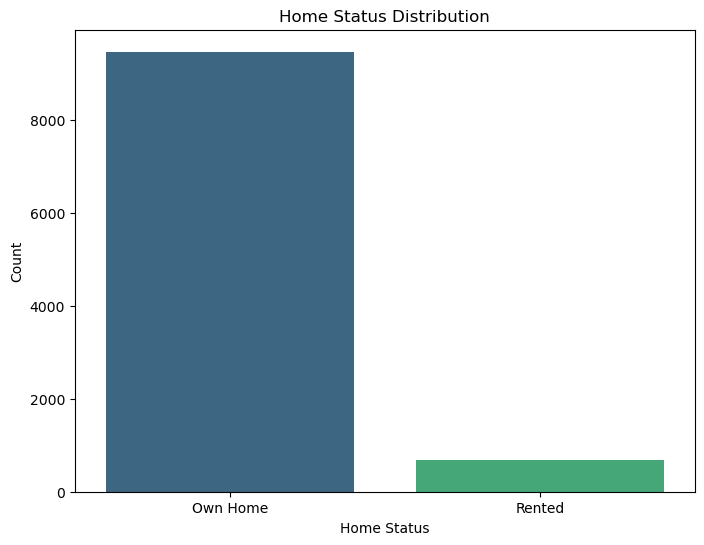

In [24]:
# Replace 'Unclassified' with overall mode of the 'home_status' column
overall_home_mode = df['home_status'].mode()[0]
df['home_status'] = df['home_status'].replace({'Unclassified': overall_home_mode})

# Map values to 'Rented' for not 'Own Home'
df['home_status'] = df['home_status'].apply(lambda x: 'Own Home' if x == 'Own Home' else 'Rented')

# Plot a bar graph for the 'home_status' column
plt.figure(figsize=(8, 6))
sns.countplot(x='home_status', data=df, palette='viridis')
plt.title('Home Status Distribution')
plt.xlabel('Home Status')
plt.ylabel('Count')
plt.show()


## The people having own home is more 

In [25]:
df

,children,status,occupation,occupation_partner,home_status,self_employed,self_employed_partner,year_last_moved,TVarea,post_code,...,Home_Loan,Online_Purchase_Amount,Discount_Offering,gender,region,Investment_in_Commudity,Investment_in_Equity,Investment_in_Derivative,Portfolio_Balance,avg_age
0,0,Partner,Professional,Professional,Own Home,No,No,1972,HTV,NP4 9HS,...,0.00,0.00,1,Female,Wales,74.67,18.66,32.32,89.43,53.0
1,0,No_Partner,Non-Professional,Non-Professional,Own Home,No,No,1998,Granada,M41 0QH,...,0.00,0.00,2,Female,North West,20.19,0.00,4.33,22.78,57.5
2,0,No_Partner,Professional,Other,Own Home,Yes,No,1996,Tyne Tees,NE30 1JZ,...,3.49,0.00,2,Male,North,98.06,31.07,80.96,171.78,28.0
3,0,No_Partner,Professional,Professional,Own Home,No,No,1997,Central,HR9 7RJ,...,0.00,0.00,2,Female,West Midlands,4.10,14.15,17.57,-41.70,19.5
4,0,Partner,Professional,Other,Own Home,No,No,1995,Scottish TV,KA10 7LS,...,45.91,25.98,2,Female,Scotland,70.16,55.86,80.44,235.02,47.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10150,1,Partner,Professional,Professional,Own Home,No,No,1972,Carlton,SM4 5RF,...,0.00,0.00,2,Female,South East,7.29,3.50,9.57,10.23,47.5
10151,0,Partner,Professional,Professional,Rented,No,No,1988,Meridian,RG14 7PA,...,0.00,0.00,2,Female,South East,62.27,3.00,36.40,102.62,47.5
10152,2,Partner,Non-Professional,Professional,Own Home,No,No,1992,Central,OX15 0PU,...,0.00,0.00,2,Female,South East,52.77,0.00,14.07,76.18,43.0
10153,0,Partner,Other,Professional,Own Home,No,Yes,1970,Carlton,CM15 0LU,...,7.98,0.00,2,Female,South East,7.20,2.99,1.66,4.79,53.0


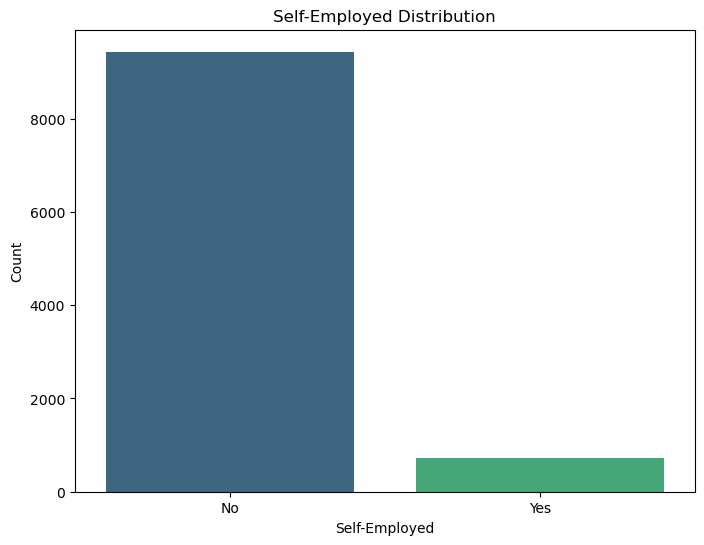

In [26]:
# Plot a bar graph for the 'self_employed' column
plt.figure(figsize=(8, 6))
sns.countplot(x='self_employed', data=df, palette='viridis')
plt.title('Self-Employed Distribution')
plt.xlabel('Self-Employed')
plt.ylabel('Count')
plt.show()


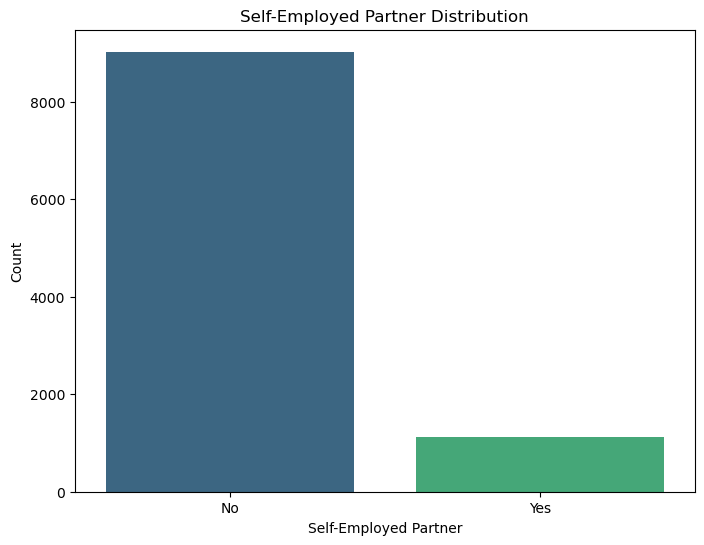

In [27]:
# Plot a bar graph for the 'self_employed_partner' column
plt.figure(figsize=(8, 6))
sns.countplot(x='self_employed_partner', data=df, palette='viridis')
plt.title('Self-Employed Partner Distribution')
plt.xlabel('Self-Employed Partner')
plt.ylabel('Count')
plt.show()


In [28]:
df["year_last_moved"].unique()

array([1972, 1998, 1996, 1997, 1995, 1984, 1985, 1993, 1987, 1986, 1994,
       1974, 1983, 1992, 1988, 1999, 1990, 1977, 1989, 1979, 1982, 1968,
       1935, 1975, 1971, 1905, 1956, 1980, 1953, 1976, 1967, 1955, 1969,
       1991, 1973,    0, 1966, 1978, 1964, 1961, 1962, 1981, 1954, 1958,
       1963, 1960, 1970, 1965, 1949, 1927, 1951, 1942, 1952, 1902, 1957,
       1959, 1946, 1908, 1930, 1917, 1936, 1947, 1937, 1948, 1910, 1943,
       1945, 1950, 1924, 1920, 1916, 1912, 1938, 1939, 1913, 1923, 1928,
       1929, 1903, 1931, 1932, 1901, 1909, 1944, 1921, 1915, 1906, 1919,
       1907, 1940, 1904, 1914, 1941, 1922, 1911], dtype=int64)

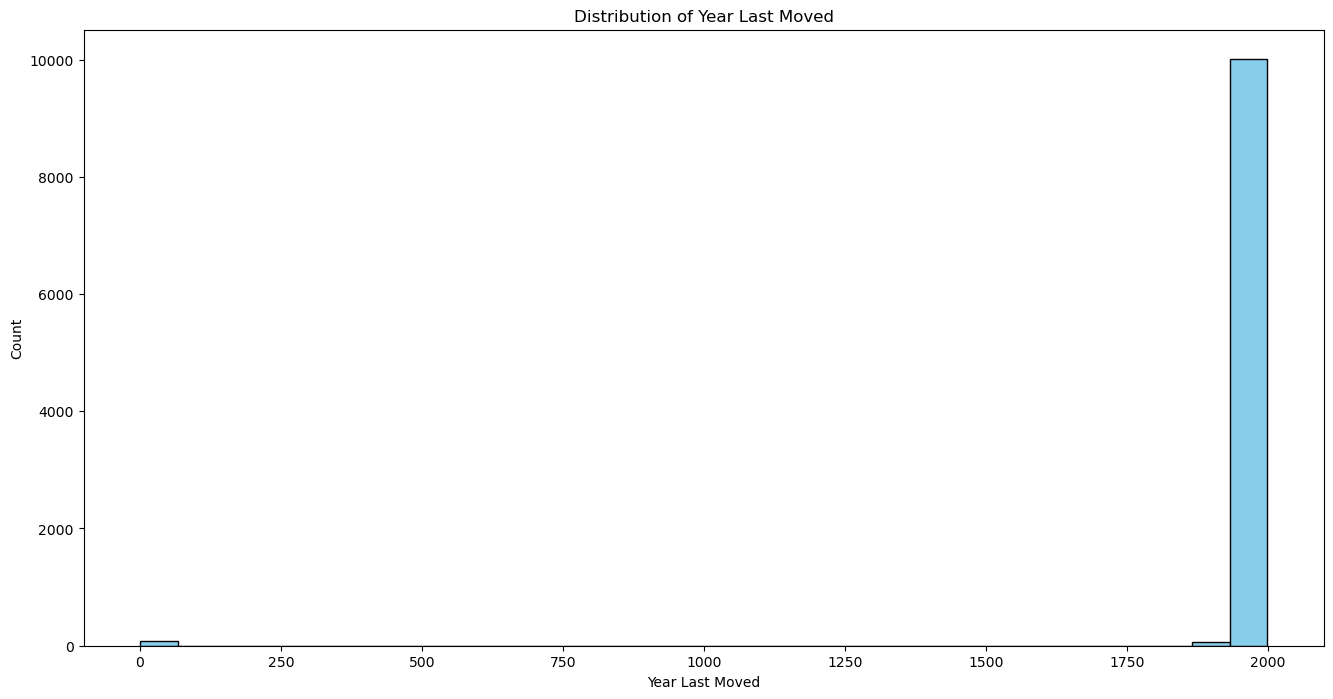

In [29]:
# Plot a histogram for the 'year_last_moved' column with a larger figure size
plt.figure(figsize=(16, 8))
plt.hist(df['year_last_moved'], bins=30, color='skyblue', edgecolor='black')
plt.title('Distribution of Year Last Moved')
plt.xlabel('Year Last Moved')
plt.ylabel('Count')
plt.show()


In [30]:
# Replace 0 with the median
median_year = df['year_last_moved'].median()
df['year_last_moved'] = df['year_last_moved'].replace(0, median_year)

# Create a new column 'decades'
df['decades'] = (df['year_last_moved'] // 10) * 10


In [31]:
df["decades"].unique()

array([1970, 1990, 1980, 1960, 1930, 1900, 1950, 1940, 1920, 1910],
      dtype=int64)

In [32]:
df=df.drop(columns='year_last_moved')

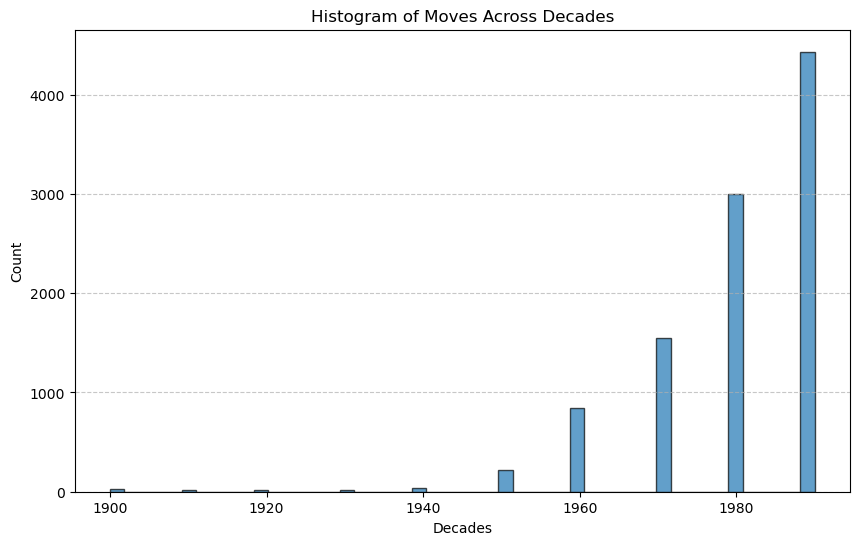

In [33]:


# Plotting a histogram for the 'decades' column
plt.figure(figsize=(10, 6))
plt.hist(df['decades'], bins='auto', edgecolor='black', alpha=0.7)
plt.title('Histogram of Moves Across Decades')
plt.xlabel('Decades')
plt.ylabel('Count')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


In [34]:
df["TVarea"].unique()

array(['HTV', 'Granada', 'Tyne Tees', 'Central', 'Scottish TV', 'Anglia',
       'Carlton', 'Meridian', 'Yorkshire', 'Grampian', 'TV South West',
       'Ulster', 'Border', 'Unknown'], dtype=object)

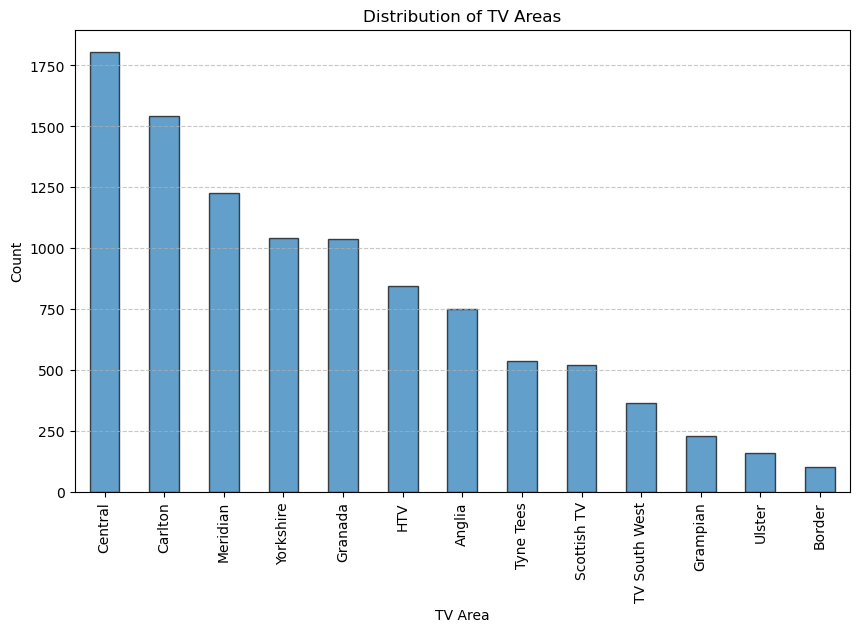

In [35]:
# Replace 'Unknown' with the mode of the 'TVarea' column
mode_tvarea = df['TVarea'].mode().iloc[0]
df['TVarea'] = df['TVarea'].replace('Unknown', mode_tvarea)

# Plot a bar graph for the 'TVarea' column
plt.figure(figsize=(10, 6))
df['TVarea'].value_counts().plot(kind='bar', edgecolor='black', alpha=0.7)
plt.title('Distribution of TV Areas')
plt.xlabel('TV Area')
plt.ylabel('Count')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


In [36]:
df.columns

Index(['children', 'status', 'occupation', 'occupation_partner', 'home_status',
       'self_employed', 'self_employed_partner', 'TVarea', 'post_code',
       'post_area', 'Average_Credit_Card_Transaction', 'Balance_Transfer',
       'Term_Deposit', 'Life_Insurance', 'Medical_Insurance',
       'Average_A/C_Balance', 'Personal_Loan', 'Investment_in_Mutual_Fund',
       'Investment_Tax_Saving_Bond', 'Home_Loan', 'Online_Purchase_Amount',
       'Discount_Offering', 'gender', 'region', 'Investment_in_Commudity',
       'Investment_in_Equity', 'Investment_in_Derivative', 'Portfolio_Balance',
       'avg_age', 'decades'],
      dtype='object')

In [37]:
df["post_code"].unique()

array(['NP4 9HS', 'M41 0QH', 'NE30 1JZ', ..., 'OX15 0PU', 'CM15 0LU',
       'SA70 7LW'], dtype=object)

In [38]:
# Assuming your postal codes are in the 'post_code' column
unique_postal_codes = df['post_code'].unique()

# Display all unique postal codes without modification
for code in unique_postal_codes:
    print(code)


NP4 9HS
M41 0QH
NE30 1JZ
HR9 7RJ
KA10 7LS
IP24 1AY
CV32 7BN
G68 9AN
E15 3AR
WA14 4UH
LL18 3BB
SA73 1AX
L7 5QN
GL2 4WP
B77 4NU
ML10 6XH
CV11 6YH
CV31 2RQ
WV15 5AY
TA2 6HY
NN6 0EE
M31 6SJ
TA11 7HD
EH23 4HG
WF17 8EQ
TN15 8DN
LE16 7LD
TA20 1LB
AB43 8WX
LS17 9BG
TN5 6NE
SP8 5ET
EX37 9TY
EX23 9PU
LN5 9TB
CF42 6NR
DE14 2BP
CB1 6SA
L31 8QY
BT37 0RJ
FK2 8DL
LL11 5LP
SA6 6AT
OL16 2XG
CB1 6UG
PR11 9QF
MK19 7NW
PR12 5RR
BH12 4DN
PR5 5LZ
LL18 2NW
BH19 1RB
LL31 9EF
LL14 1SW
RG41 3AZ
GL6 6HL
BB5 2TU
AL4 9SJ
KY2 6QX
RH17 5JJ
RG42 2QG
EN2 7LD
NG9 5HX
DE21 2TN
M33 5DX
TQ4 7SP
M46 9LU
DH8 0EU
GL2 8HU
ML5 1EL
L17 3AG
NG10 2BN
PO7 6EA
IV36 2SA
B90 2PQ
CV22 7SJ
SO31 8ER
G65 9NR
ST14 8UX
YO25 3TU
OX8 5JR
RM14 3TJ
CH5 4UB
BT43 7DT
PE37 8BS
NE45 5LY
B98 0BJ
CM3 2NP
HP15 7UN
B62 8TQ
KY11 3EE
AB42 0NW
NR30 5XE
PA31 8SZ
CR2 6DP
RG42 1YH
PA1 2TT
M34 1TS
PO4 9JX
SA11 5BA
L37 1XT
TR8 5LG
AB12 3WF
NN12 8RS
M2 4SU
L23 7TS
BB1 4BX
DD10 0TT
PE6 0QE
L27 0RB
KA3 7UA
SN15 2AR
DE55 6BR
TN35 5EU
DL15 0JX
CT11 0LP
TS5 8LG
YO3

In [39]:
unique_postal_code_counts = df['post_code'].value_counts()
print(unique_postal_code_counts)


post_code
SA15 3HP    2
TQ12 6YA    2
NN11 5QA    2
PO36 9HR    2
LU7 7UQ     2
           ..
NR33 8TX    1
NG4 2DJ     1
WA7 1JJ     1
BB12 7HS    1
SA70 7LW    1
Name: count, Length: 10040, dtype: int64


In [40]:
total_unique_postal_codes = df['post_code'].nunique()
total_rows = len(df)

# Display the result
print(f"Total unique postal codes out of {total_rows} rows: {total_unique_postal_codes}")


Total unique postal codes out of 10155 rows: 10040


In [41]:
df["post_area"].unique()

array(['NP4', 'M41', 'NE30', ..., 'WV4', 'S10', 'PH13'], dtype=object)

In [42]:
total_unique_postal_areas = df['post_code'].nunique()
total_rows = len(df)

# Display the result
print(f"Total unique postal areas out of {total_rows} rows: {total_unique_postal_areas}")

Total unique postal areas out of 10155 rows: 10040


In [43]:
# Assuming your postal codes are in the 'post_code' column
df['post_code'] = df['post_code'].str[:2]

# Display the updated DataFrame
print(df['post_code'])


0        NP
1        M4
2        NE
3        HR
4        KA
         ..
10150    SM
10151    RG
10152    OX
10153    CM
10154    SA
Name: post_code, Length: 10155, dtype: object


In [44]:
total_unique_postal_areas = df['post_code'].nunique()
total_rows = len(df)

# Display the result
print(f"Total unique postal areas out of {total_rows} rows: {total_unique_postal_areas}")

Total unique postal areas out of 10155 rows: 157


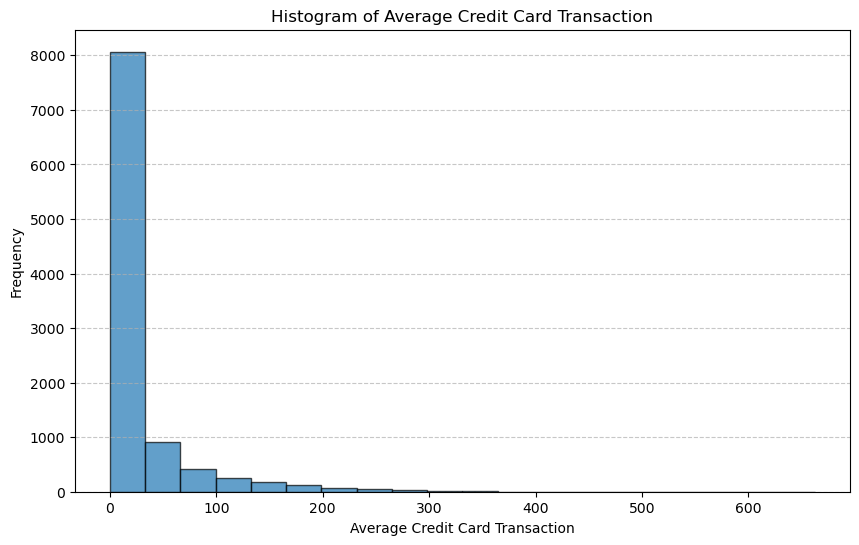

In [45]:
# Assuming the column name is 'Average_Credit_Card_Transaction'
plt.figure(figsize=(10, 6))
plt.hist(df['Average_Credit_Card_Transaction'], bins=20, edgecolor='black', alpha=0.7)
plt.title('Histogram of Average Credit Card Transaction')
plt.xlabel('Average Credit Card Transaction')
plt.ylabel('Frequency')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


In [46]:
df["Average_Credit_Card_Transaction"].unique()

array([148.44,   0.  ,  73.45, ..., 152.47, 176.9 , 124.93])

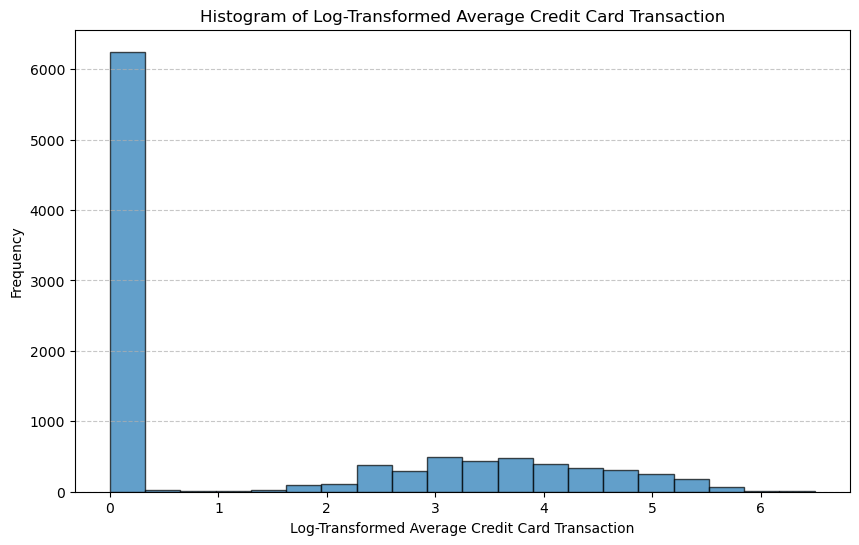

In [47]:


# Log transformation using log1p on the existing column
df['Average_Credit_Card_Transaction'] = np.log1p(df['Average_Credit_Card_Transaction'])

# Plot the histogram of the log-transformed data
plt.figure(figsize=(10, 6))
plt.hist(df['Average_Credit_Card_Transaction'], bins=20, edgecolor='black', alpha=0.7)
plt.title('Histogram of Log-Transformed Average Credit Card Transaction')
plt.xlabel('Log-Transformed Average Credit Card Transaction')
plt.ylabel('Frequency')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


In [48]:
# Select numerical columns using DataFrame's select_dtypes method
numerical_columns = df.select_dtypes(include=['int64', 'float64'])

# Display the resulting DataFrame with only numerical columns
numerical_columns


,Average_Credit_Card_Transaction,Balance_Transfer,Term_Deposit,Life_Insurance,Medical_Insurance,Average_A/C_Balance,Personal_Loan,Investment_in_Mutual_Fund,Investment_Tax_Saving_Bond,Home_Loan,Online_Purchase_Amount,Discount_Offering,Investment_in_Commudity,Investment_in_Equity,Investment_in_Derivative,Portfolio_Balance,avg_age,decades
0,5.006895,142.95,0.00,81.96,0.00,29.99,0.00,61.95,19.99,0.00,0.00,1,74.67,18.66,32.32,89.43,53.0,1970
1,0.000000,74.98,0.00,25.99,0.00,0.00,0.00,0.00,0.00,0.00,0.00,2,20.19,0.00,4.33,22.78,57.5,1990
2,0.000000,166.44,20.99,291.37,11.48,166.94,0.00,15.99,0.00,3.49,0.00,2,98.06,31.07,80.96,171.78,28.0,1990
3,0.000000,0.00,0.00,20.49,0.00,39.46,0.00,45.44,0.00,0.00,0.00,2,4.10,14.15,17.57,-41.70,19.5,1990
4,4.310128,57.96,0.00,177.42,41.95,39.47,10.97,212.84,0.00,45.91,25.98,2,70.16,55.86,80.44,235.02,47.5,1990
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10150,0.000000,0.00,0.00,29.97,6.49,0.00,8.99,7.49,4.49,0.00,0.00,2,7.29,3.50,9.57,10.23,47.5,1970
10151,0.000000,110.95,0.00,200.41,0.00,2.99,0.00,14.99,0.00,0.00,0.00,2,62.27,3.00,36.40,102.62,47.5,1980
10152,4.835726,0.00,54.48,0.00,84.42,0.00,0.00,0.00,0.00,0.00,0.00,2,52.77,0.00,14.07,76.18,43.0,1990
10153,0.000000,35.98,0.00,0.00,0.00,0.00,0.00,9.98,0.00,7.98,0.00,2,7.20,2.99,1.66,4.79,53.0,1970


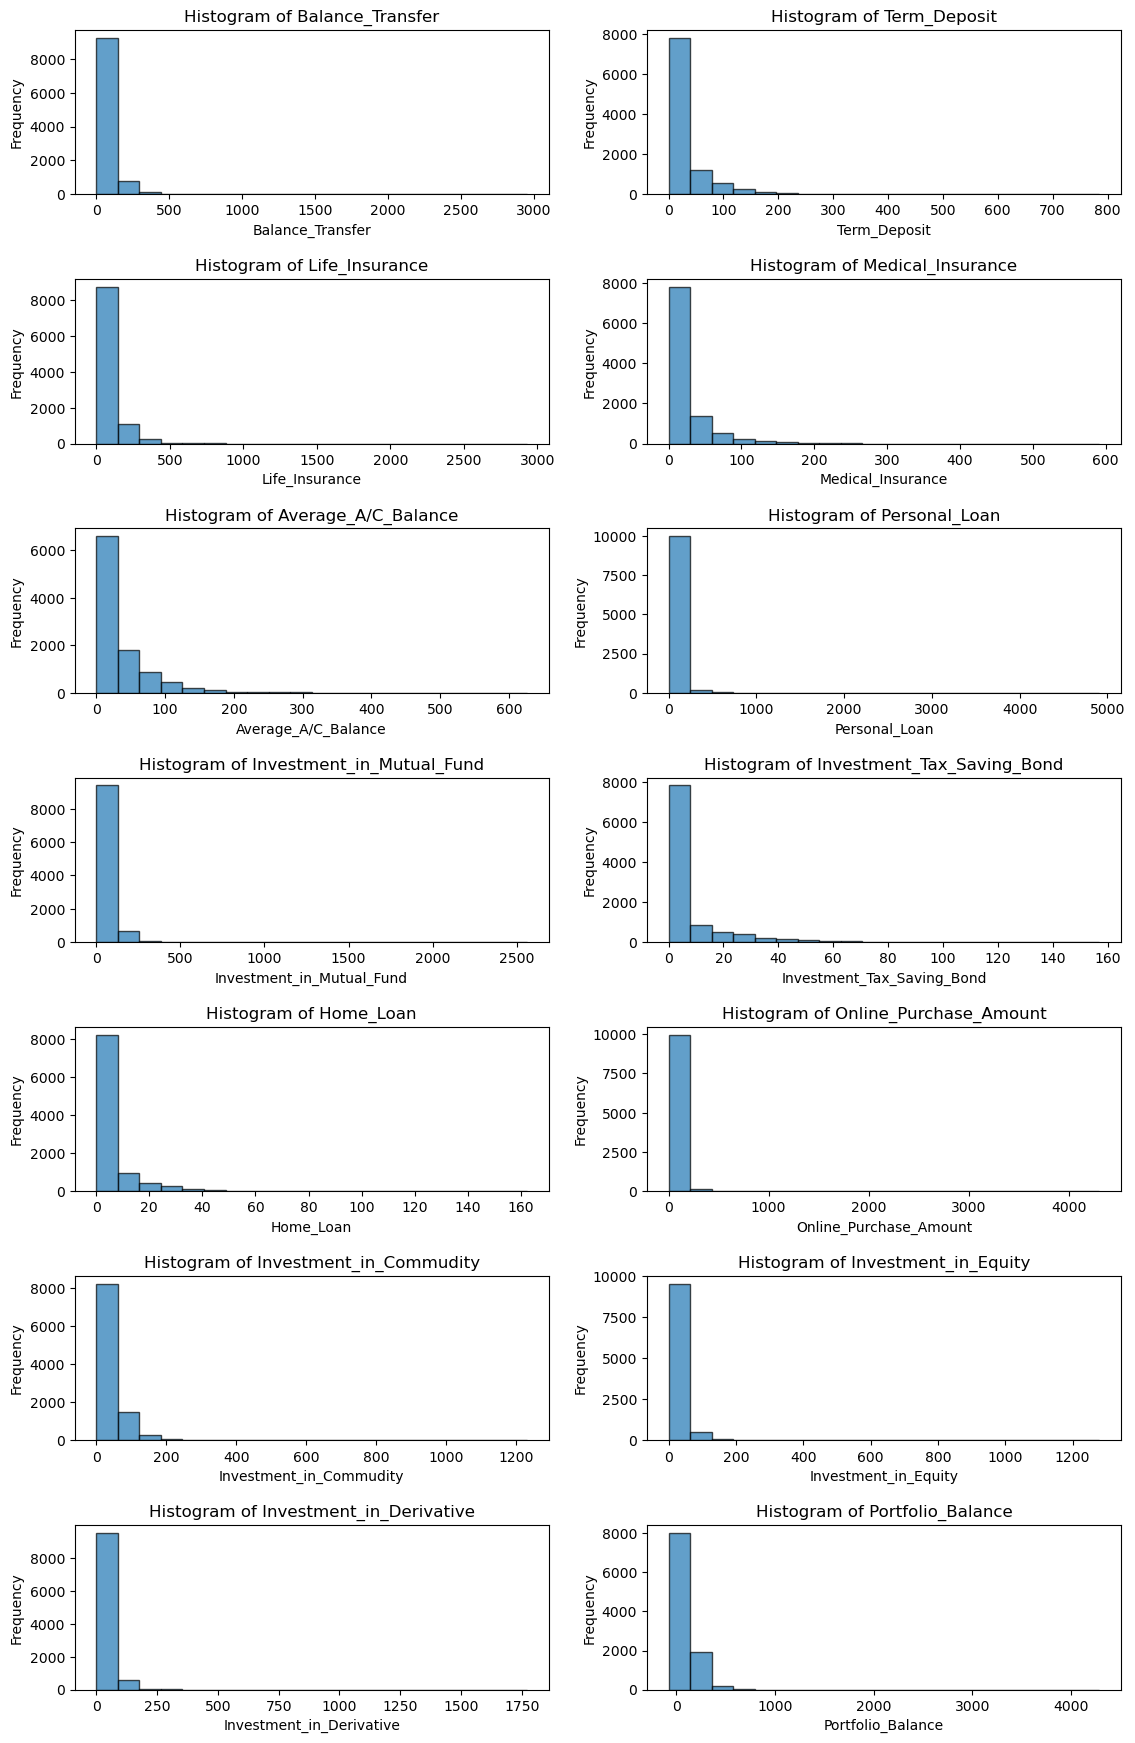

In [49]:
import matplotlib.pyplot as plt

# List of columns to create histograms for
columns_to_plot = [
    'Balance_Transfer', 'Term_Deposit', 'Life_Insurance', 'Medical_Insurance',
    'Average_A/C_Balance', 'Personal_Loan', 'Investment_in_Mutual_Fund',
    'Investment_Tax_Saving_Bond', 'Home_Loan', 'Online_Purchase_Amount',
    'Investment_in_Commudity', 'Investment_in_Equity', 'Investment_in_Derivative',
    'Portfolio_Balance'
]

# Set up the subplots
fig, axes = plt.subplots(nrows=len(columns_to_plot) // 2, ncols=2, figsize=(12, 18))
fig.tight_layout(pad=4.0)

# Plot histograms for each column
for i, column in enumerate(columns_to_plot):
    ax = axes[i // 2, i % 2]
    ax.hist(df[column], bins=20, edgecolor='black', alpha=0.7)
    ax.set_title(f'Histogram of {column}')
    ax.set_xlabel(column)
    ax.set_ylabel('Frequency')

plt.show()


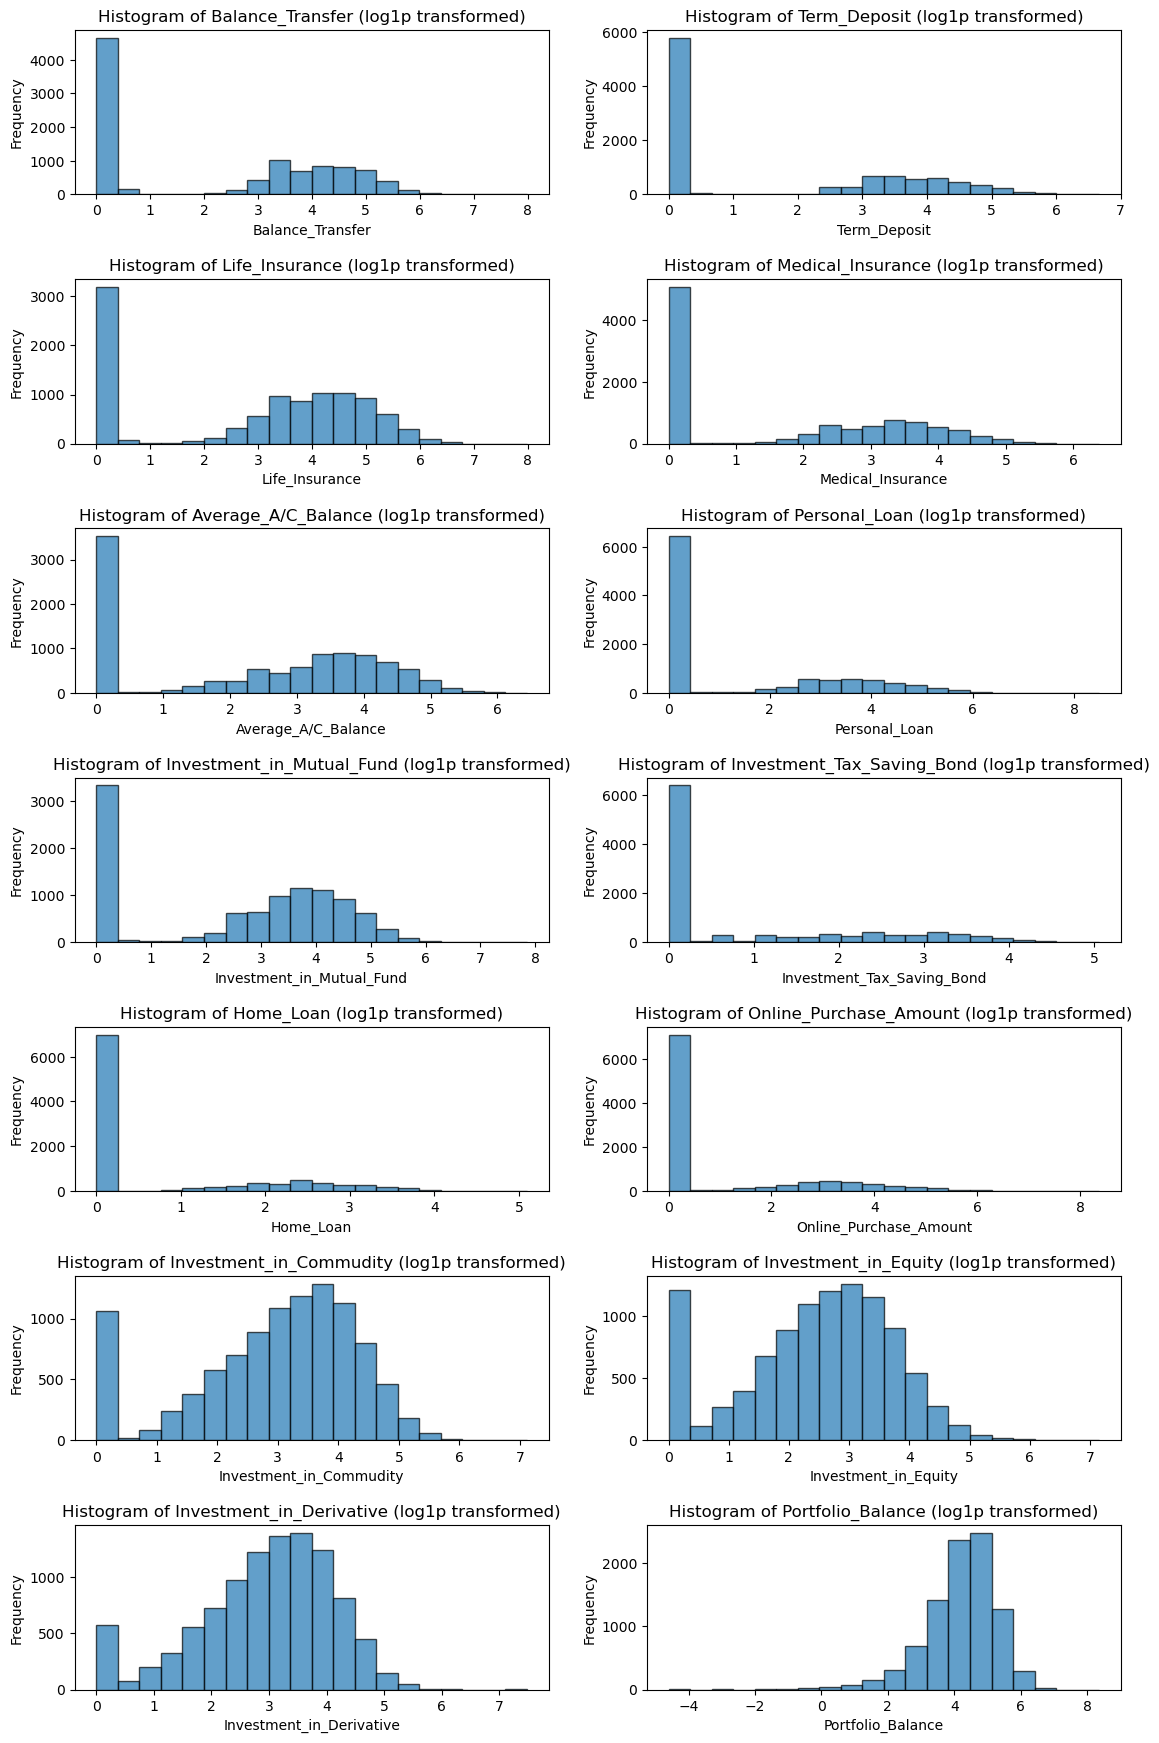

In [50]:
import matplotlib.pyplot as plt
import numpy as np

# List of columns to create histograms for
columns_to_plot = [
    'Balance_Transfer', 'Term_Deposit', 'Life_Insurance', 'Medical_Insurance',
    'Average_A/C_Balance', 'Personal_Loan', 'Investment_in_Mutual_Fund',
    'Investment_Tax_Saving_Bond', 'Home_Loan', 'Online_Purchase_Amount',
    'Investment_in_Commudity', 'Investment_in_Equity', 'Investment_in_Derivative',
    'Portfolio_Balance'
]

# Apply log1p transformation to each column
for column in columns_to_plot:
    df[column] = np.log1p(df[column])

# Set up the subplots
fig, axes = plt.subplots(nrows=len(columns_to_plot) // 2, ncols=2, figsize=(12, 18))
fig.tight_layout(pad=4.0)

# Plot histograms for each column after log1p transformation
for i, column in enumerate(columns_to_plot):
    ax = axes[i // 2, i % 2]
    ax.hist(df[column], bins=20, edgecolor='black', alpha=0.7)
    ax.set_title(f'Histogram of {column} (log1p transformed)')
    ax.set_xlabel(column)
    ax.set_ylabel('Frequency')

plt.show()


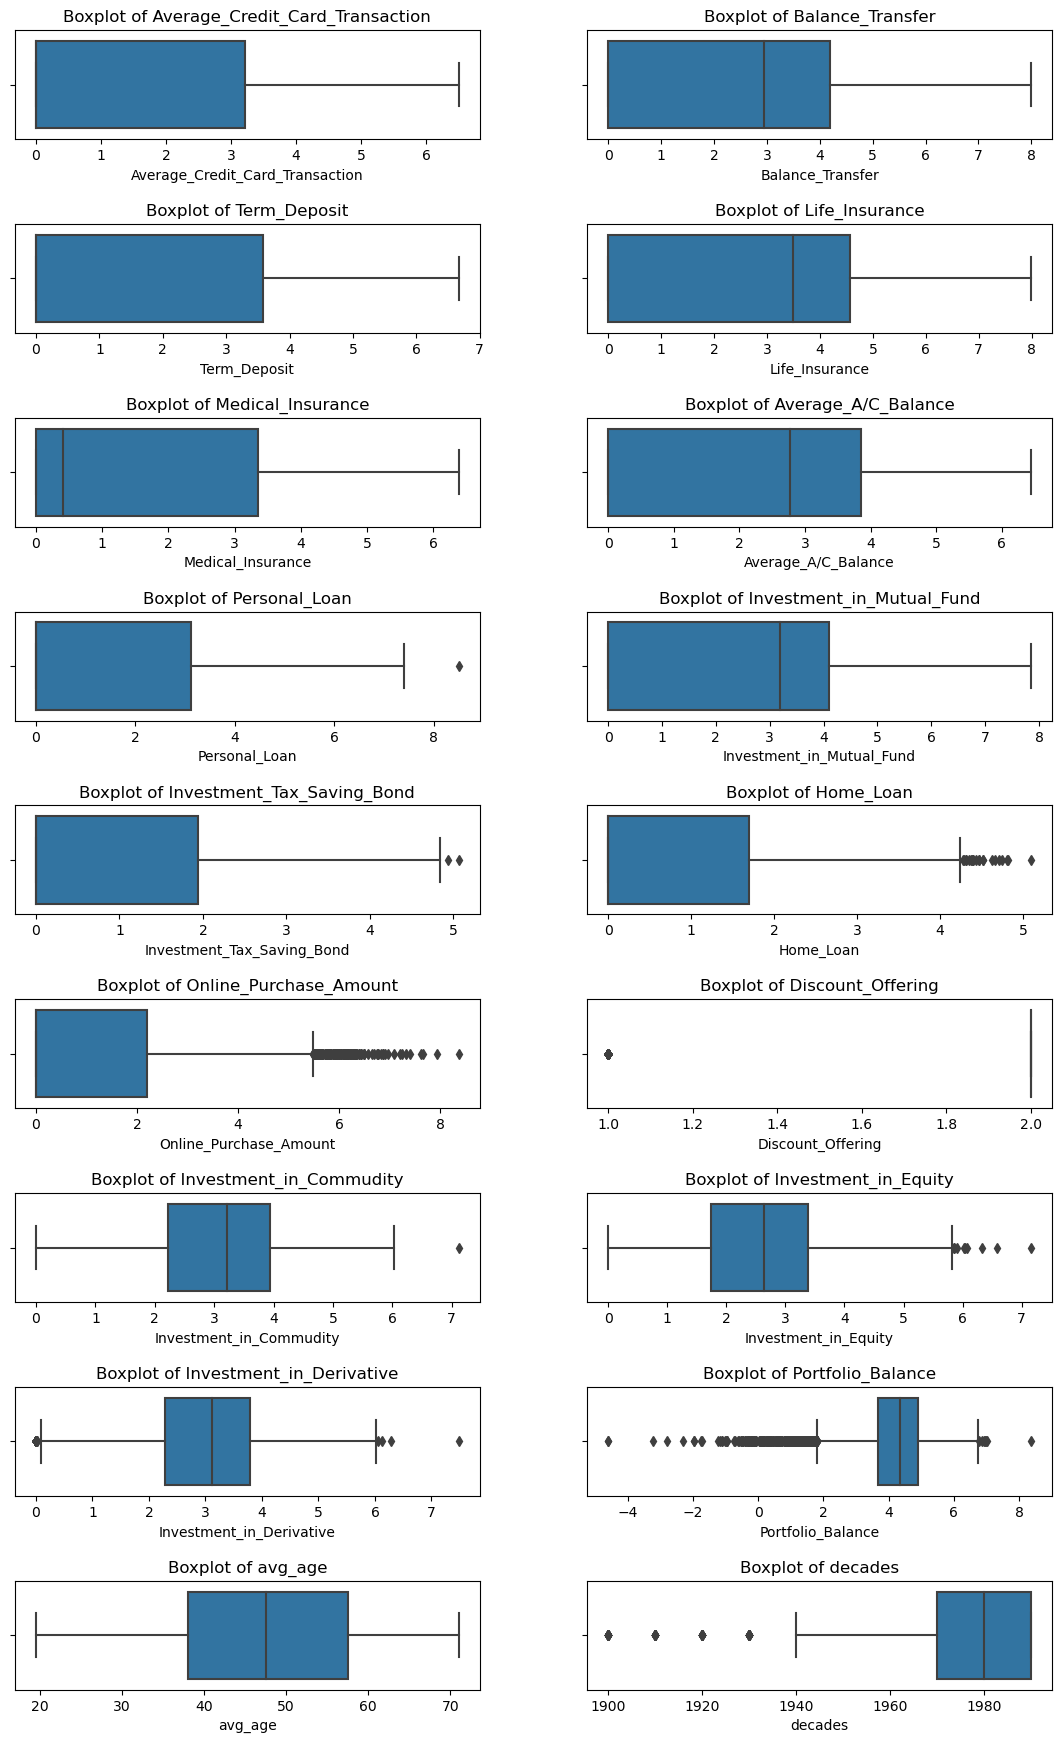

In [51]:
import matplotlib.pyplot as plt
import seaborn as sns

# Select only numerical columns
numerical_columns = df.select_dtypes(include=['float64', 'int64']).columns

# Set up the subplots
fig, axes = plt.subplots(nrows=len(numerical_columns) // 2, ncols=2, figsize=(12, 18))
fig.tight_layout(pad=4.0)

# Plot boxplots for each numerical column
for i, column in enumerate(numerical_columns):
    ax = axes[i // 2, i % 2]
    sns.boxplot(x=df[column], ax=ax)
    ax.set_title(f'Boxplot of {column}')
    ax.set_xlabel(column)

plt.show()


In [52]:
# Select only object columns
object_columns = df.select_dtypes(include='object').columns

# Display unique values for each object column
for column in object_columns:
    unique_values = df[column].unique()
    print(f"Unique values for {column}: {unique_values}")
    print()


Unique values for status: ['Partner' 'No_Partner']

Unique values for occupation: ['Professional' 'Non-Professional' 'Other']

Unique values for occupation_partner: ['Professional' 'Non-Professional' 'Other']

Unique values for home_status: ['Own Home' 'Rented']

Unique values for self_employed: ['No' 'Yes']

Unique values for self_employed_partner: ['No' 'Yes']

Unique values for TVarea: ['HTV' 'Granada' 'Tyne Tees' 'Central' 'Scottish TV' 'Anglia' 'Carlton'
 'Meridian' 'Yorkshire' 'Grampian' 'TV South West' 'Ulster' 'Border']

Unique values for post_code: ['NP' 'M4' 'NE' 'HR' 'KA' 'IP' 'CV' 'G6' 'E1' 'WA' 'LL' 'SA' 'L7' 'GL'
 'B7' 'ML' 'WV' 'TA' 'NN' 'M3' 'EH' 'WF' 'TN' 'LE' 'AB' 'LS' 'SP' 'EX'
 'LN' 'CF' 'DE' 'CB' 'L3' 'BT' 'FK' 'OL' 'PR' 'MK' 'BH' 'RG' 'BB' 'AL'
 'KY' 'RH' 'EN' 'NG' 'TQ' 'DH' 'L1' 'PO' 'IV' 'B9' 'SO' 'ST' 'YO' 'OX'
 'RM' 'CH' 'PE' 'CM' 'HP' 'B6' 'NR' 'PA' 'CR' 'TR' 'M2' 'L2' 'DD' 'SN'
 'DL' 'CT' 'TS' 'DN' 'DY' 'SM' 'WN' 'CO' 'S6' 'CA' 'S7' 'NW' 'HU' 'HX'
 'DT' 'CW'

In [53]:
# Fill 'Unknown' values in 'gender' column with mode
df['gender'].replace('Unknown', df['gender'].mode()[0], inplace=True)

# Fill 'Unknown' values in 'region' column with mode
df['region'].replace('Unknown', df['region'].mode()[0], inplace=True)


In [54]:
df=df.drop(columns="post_area")

In [55]:
df

,children,status,occupation,occupation_partner,home_status,self_employed,self_employed_partner,TVarea,post_code,Average_Credit_Card_Transaction,...,Online_Purchase_Amount,Discount_Offering,gender,region,Investment_in_Commudity,Investment_in_Equity,Investment_in_Derivative,Portfolio_Balance,avg_age,decades
0,0,Partner,Professional,Professional,Own Home,No,No,HTV,NP,5.006895,...,0.000000,1,Female,Wales,4.326382,2.978586,3.506158,4.504576,53.0,1970
1,0,No_Partner,Non-Professional,Non-Professional,Own Home,No,No,Granada,M4,0.000000,...,0.000000,2,Female,North West,3.053529,0.000000,1.673351,3.168845,57.5,1990
2,0,No_Partner,Professional,Other,Own Home,Yes,No,Tyne Tees,NE,0.000000,...,0.000000,2,Male,North,4.595726,3.467921,4.406231,5.152019,28.0,1990
3,0,No_Partner,Professional,Professional,Own Home,No,No,Central,HR,0.000000,...,0.000000,2,Female,West Midlands,1.629241,2.718001,2.921547,NaN,19.5,1990
4,0,Partner,Professional,Other,Own Home,No,No,Scottish TV,KA,4.310128,...,3.295096,2,Female,Scotland,4.264931,4.040592,4.399867,5.463917,47.5,1990
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10150,1,Partner,Professional,Professional,Own Home,No,No,Carlton,SM,0.000000,...,0.000000,2,Female,South East,2.115050,1.504077,2.358020,2.418589,47.5,1970
10151,0,Partner,Professional,Professional,Rented,No,No,Meridian,RG,0.000000,...,0.000000,2,Female,South East,4.147411,1.386294,3.621671,4.640730,47.5,1980
10152,2,Partner,Non-Professional,Professional,Own Home,No,No,Central,OX,4.835726,...,0.000000,2,Female,South East,3.984716,0.000000,2.712706,4.346140,43.0,1990
10153,0,Partner,Other,Professional,Own Home,No,Yes,Carlton,CM,0.000000,...,0.000000,2,Female,South East,2.104134,1.383791,0.978326,1.756132,53.0,1970


In [56]:
df.isnull().sum()

children                              0
status                                0
occupation                            0
occupation_partner                    0
home_status                           0
self_employed                         0
self_employed_partner                 0
TVarea                                0
post_code                             0
Average_Credit_Card_Transaction       0
Balance_Transfer                      0
Term_Deposit                          0
Life_Insurance                        0
Medical_Insurance                     0
Average_A/C_Balance                   0
Personal_Loan                         0
Investment_in_Mutual_Fund             0
Investment_Tax_Saving_Bond            0
Home_Loan                             0
Online_Purchase_Amount                0
Discount_Offering                     0
gender                                0
region                                0
Investment_in_Commudity               0
Investment_in_Equity                  0


In [57]:
# Fill missing values in 'Portfolio_Balance' column with median
df['Portfolio_Balance'].fillna(df['Portfolio_Balance'].median(), inplace=True)


In [58]:
df["Discount_Offering"].unique()

array([1, 2], dtype=int64)

In [59]:
# Replace values in 'Discount_Offering' column
df['Discount_Offering'].replace({1: 0, 2: 1}, inplace=True)


In [60]:
df

,children,status,occupation,occupation_partner,home_status,self_employed,self_employed_partner,TVarea,post_code,Average_Credit_Card_Transaction,...,Online_Purchase_Amount,Discount_Offering,gender,region,Investment_in_Commudity,Investment_in_Equity,Investment_in_Derivative,Portfolio_Balance,avg_age,decades
0,0,Partner,Professional,Professional,Own Home,No,No,HTV,NP,5.006895,...,0.000000,0,Female,Wales,4.326382,2.978586,3.506158,4.504576,53.0,1970
1,0,No_Partner,Non-Professional,Non-Professional,Own Home,No,No,Granada,M4,0.000000,...,0.000000,1,Female,North West,3.053529,0.000000,1.673351,3.168845,57.5,1990
2,0,No_Partner,Professional,Other,Own Home,Yes,No,Tyne Tees,NE,0.000000,...,0.000000,1,Male,North,4.595726,3.467921,4.406231,5.152019,28.0,1990
3,0,No_Partner,Professional,Professional,Own Home,No,No,Central,HR,0.000000,...,0.000000,1,Female,West Midlands,1.629241,2.718001,2.921547,4.344909,19.5,1990
4,0,Partner,Professional,Other,Own Home,No,No,Scottish TV,KA,4.310128,...,3.295096,1,Female,Scotland,4.264931,4.040592,4.399867,5.463917,47.5,1990
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10150,1,Partner,Professional,Professional,Own Home,No,No,Carlton,SM,0.000000,...,0.000000,1,Female,South East,2.115050,1.504077,2.358020,2.418589,47.5,1970
10151,0,Partner,Professional,Professional,Rented,No,No,Meridian,RG,0.000000,...,0.000000,1,Female,South East,4.147411,1.386294,3.621671,4.640730,47.5,1980
10152,2,Partner,Non-Professional,Professional,Own Home,No,No,Central,OX,4.835726,...,0.000000,1,Female,South East,3.984716,0.000000,2.712706,4.346140,43.0,1990
10153,0,Partner,Other,Professional,Own Home,No,Yes,Carlton,CM,0.000000,...,0.000000,1,Female,South East,2.104134,1.383791,0.978326,1.756132,53.0,1970


In [61]:
# Select only object columns
object_columns = df.select_dtypes(include='object').columns

# Display unique values for each object column
for column in object_columns:
    unique_values = df[column].unique()
    print(f"Unique values for {column}: {unique_values}")
    print()

Unique values for status: ['Partner' 'No_Partner']

Unique values for occupation: ['Professional' 'Non-Professional' 'Other']

Unique values for occupation_partner: ['Professional' 'Non-Professional' 'Other']

Unique values for home_status: ['Own Home' 'Rented']

Unique values for self_employed: ['No' 'Yes']

Unique values for self_employed_partner: ['No' 'Yes']

Unique values for TVarea: ['HTV' 'Granada' 'Tyne Tees' 'Central' 'Scottish TV' 'Anglia' 'Carlton'
 'Meridian' 'Yorkshire' 'Grampian' 'TV South West' 'Ulster' 'Border']

Unique values for post_code: ['NP' 'M4' 'NE' 'HR' 'KA' 'IP' 'CV' 'G6' 'E1' 'WA' 'LL' 'SA' 'L7' 'GL'
 'B7' 'ML' 'WV' 'TA' 'NN' 'M3' 'EH' 'WF' 'TN' 'LE' 'AB' 'LS' 'SP' 'EX'
 'LN' 'CF' 'DE' 'CB' 'L3' 'BT' 'FK' 'OL' 'PR' 'MK' 'BH' 'RG' 'BB' 'AL'
 'KY' 'RH' 'EN' 'NG' 'TQ' 'DH' 'L1' 'PO' 'IV' 'B9' 'SO' 'ST' 'YO' 'OX'
 'RM' 'CH' 'PE' 'CM' 'HP' 'B6' 'NR' 'PA' 'CR' 'TR' 'M2' 'L2' 'DD' 'SN'
 'DL' 'CT' 'TS' 'DN' 'DY' 'SM' 'WN' 'CO' 'S6' 'CA' 'S7' 'NW' 'HU' 'HX'
 'DT' 'CW'

In [62]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10155 entries, 0 to 10154
Data columns (total 29 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   children                         10155 non-null  int32  
 1   status                           10155 non-null  object 
 2   occupation                       10155 non-null  object 
 3   occupation_partner               10155 non-null  object 
 4   home_status                      10155 non-null  object 
 5   self_employed                    10155 non-null  object 
 6   self_employed_partner            10155 non-null  object 
 7   TVarea                           10155 non-null  object 
 8   post_code                        10155 non-null  object 
 9   Average_Credit_Card_Transaction  10155 non-null  float64
 10  Balance_Transfer                 10155 non-null  float64
 11  Term_Deposit                     10155 non-null  float64
 12  Life_Insurance    

In [63]:
df

,children,status,occupation,occupation_partner,home_status,self_employed,self_employed_partner,TVarea,post_code,Average_Credit_Card_Transaction,...,Online_Purchase_Amount,Discount_Offering,gender,region,Investment_in_Commudity,Investment_in_Equity,Investment_in_Derivative,Portfolio_Balance,avg_age,decades
0,0,Partner,Professional,Professional,Own Home,No,No,HTV,NP,5.006895,...,0.000000,0,Female,Wales,4.326382,2.978586,3.506158,4.504576,53.0,1970
1,0,No_Partner,Non-Professional,Non-Professional,Own Home,No,No,Granada,M4,0.000000,...,0.000000,1,Female,North West,3.053529,0.000000,1.673351,3.168845,57.5,1990
2,0,No_Partner,Professional,Other,Own Home,Yes,No,Tyne Tees,NE,0.000000,...,0.000000,1,Male,North,4.595726,3.467921,4.406231,5.152019,28.0,1990
3,0,No_Partner,Professional,Professional,Own Home,No,No,Central,HR,0.000000,...,0.000000,1,Female,West Midlands,1.629241,2.718001,2.921547,4.344909,19.5,1990
4,0,Partner,Professional,Other,Own Home,No,No,Scottish TV,KA,4.310128,...,3.295096,1,Female,Scotland,4.264931,4.040592,4.399867,5.463917,47.5,1990
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10150,1,Partner,Professional,Professional,Own Home,No,No,Carlton,SM,0.000000,...,0.000000,1,Female,South East,2.115050,1.504077,2.358020,2.418589,47.5,1970
10151,0,Partner,Professional,Professional,Rented,No,No,Meridian,RG,0.000000,...,0.000000,1,Female,South East,4.147411,1.386294,3.621671,4.640730,47.5,1980
10152,2,Partner,Non-Professional,Professional,Own Home,No,No,Central,OX,4.835726,...,0.000000,1,Female,South East,3.984716,0.000000,2.712706,4.346140,43.0,1990
10153,0,Partner,Other,Professional,Own Home,No,Yes,Carlton,CM,0.000000,...,0.000000,1,Female,South East,2.104134,1.383791,0.978326,1.756132,53.0,1970


In [64]:
# Create a copy of df as df2
df2 = df.copy()

# Identify columns with 'object' dtype in df2
object_columns_df2 = df2.select_dtypes(include='object').columns

# Create one-hot encoding for all 'object' columns in df2 with 0 and 1 values
df2 = pd.get_dummies(df2, columns=object_columns_df2, dtype=int)

# Display the original DataFrame (df)
print(df.head())

# Display the new DataFrame with one-hot encoding (df2)
print(df2.head())


   children      status        occupation occupation_partner home_status  \
0         0     Partner      Professional       Professional    Own Home   
1         0  No_Partner  Non-Professional   Non-Professional    Own Home   
2         0  No_Partner      Professional              Other    Own Home   
3         0  No_Partner      Professional       Professional    Own Home   
4         0     Partner      Professional              Other    Own Home   

  self_employed self_employed_partner       TVarea post_code  \
0            No                    No          HTV        NP   
1            No                    No      Granada        M4   
2           Yes                    No    Tyne Tees        NE   
3            No                    No      Central        HR   
4            No                    No  Scottish TV        KA   

   Average_Credit_Card_Transaction  ...  Online_Purchase_Amount  \
0                         5.006895  ...                0.000000   
1                       

In [65]:
from sklearn.model_selection import train_test_split

# Features (X): All columns except 'Discount_Offering'
X = df2.drop('Discount_Offering', axis=1)

# Target variable (y): 'Discount_Offering'
y = df2[['Discount_Offering']]

# Split the data into training (70%) and testing (30%) sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

# Display the shape of the training and testing sets
print("Training set shape - X_train:", X_train.shape, "y_train:", y_train.shape)
print("Testing set shape - X_test:", X_test.shape, "y_test:", y_test.shape)


Training set shape - X_train: (7108, 216) y_train: (7108, 1)
Testing set shape - X_test: (3047, 216) y_test: (3047, 1)


In [66]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import recall_score

# Assuming 'ada_model' is your AdaBoost model
ada_model = AdaBoostClassifier(random_state=1)

# Fit the AdaBoost model on training data
ada_model.fit(X_train, y_train)




AdaBoostClassifier(random_state=1)

In [78]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import recall_score

# Assuming 'ada_model' is your AdaBoost model
ada_model = AdaBoostClassifier(random_state=1)

# Fit the AdaBoost model on training data
ada_model.fit(X_train, y_train)

# Calculate recall for training data with AdaBoost
recall_train = recall_score(y_train, ada_model.predict(X_train))

# Calculate recall for testing data with AdaBoost
recall_test = recall_score(y_test, ada_model.predict(X_test))

# Print the results
print("Recall on Training Data:", recall_train)
print("Recall on Testing Data:", recall_test)


Recall on Training Data: 0.9864907320138234
Recall on Testing Data: 0.9829818719940806


In [70]:
from sklearn.model_selection import RandomizedSearchCV
# Create AdaBoost classifier
ada_model = AdaBoostClassifier(random_state=1)

# Define hyperparameter distribution
param_dist = {
    'n_estimators': np.arange(50, 201, 50),
    'learning_rate': [0.01, 0.1, 0.5, 1.0],
}

# Use RandomizedSearchCV for hyperparameter tuning
random_search = RandomizedSearchCV(ada_model, param_distributions=param_dist, n_iter=10, scoring='recall', cv=3, random_state=1)
random_search.fit(X_train, y_train)

# Get the best hyperparameters
best_params_random = random_search.best_params_

# Fit AdaBoost with the best hyperparameters on training data
best_ada_model_random = AdaBoostClassifier(**best_params_random, random_state=1)
best_ada_model_random.fit(X_train, y_train)

# Calculate recall for training data with tuned AdaBoost
recall_train_tuned_random = recall_score(y_train, best_ada_model_random.predict(X_train))

# Calculate recall for testing data with tuned AdaBoost
recall_test_tuned_random = recall_score(y_test, best_ada_model_random.predict(X_test))

# Print the results
print("Recall on Training Data (Tuned AdaBoost - Randomized Search):", recall_train_tuned_random)
print("Recall on Testing Data (Tuned AdaBoost - Randomized Search):", recall_test_tuned_random)


Recall on Training Data (Tuned AdaBoost - Randomized Search): 0.9891611687087654
Recall on Testing Data (Tuned AdaBoost - Randomized Search): 0.9863115057343692


In [68]:
from sklearn.ensemble import GradientBoostingClassifier

# Assuming 'gb_model' is your Gradient Boosting model
gb_model = GradientBoostingClassifier(random_state=1)

# Fit the Gradient Boosting model on training data
gb_model.fit(X_train, y_train)

# Calculate recall for training data with Gradient Boosting
recall_train_gb = recall_score(y_train, gb_model.predict(X_train))

# Calculate recall for testing data with Gradient Boosting
recall_test_gb = recall_score(y_test, gb_model.predict(X_test))

# Print the results
print("Recall on Training Data (Gradient Boosting):", recall_train_gb)
print("Recall on Testing Data (Gradient Boosting):", recall_test_gb)


Recall on Training Data (Gradient Boosting): 0.9949732956330506
Recall on Testing Data (Gradient Boosting): 0.9874213836477987


In [71]:
# Create Gradient Boosting classifier
gb_model = GradientBoostingClassifier(random_state=1)

# Define hyperparameter distribution
param_dist_gb = {
    'n_estimators': np.arange(50, 201, 50),
    'learning_rate': [0.01, 0.1, 0.5, 1.0],
    'max_depth': [3, 5, 7, 9],
}

# Use RandomizedSearchCV for hyperparameter tuning
random_search_gb = RandomizedSearchCV(gb_model, param_distributions=param_dist_gb, n_iter=10, scoring='recall', cv=3, random_state=1)
random_search_gb.fit(X_train, y_train)

# Get the best hyperparameters
best_params_random_gb = random_search_gb.best_params_

# Fit Gradient Boosting with the best hyperparameters on training data
best_gb_model_random = GradientBoostingClassifier(**best_params_random_gb, random_state=1)
best_gb_model_random.fit(X_train, y_train)

# Calculate recall for training data with tuned Gradient Boosting
recall_train_tuned_random_gb = recall_score(y_train, best_gb_model_random.predict(X_train))

# Calculate recall for testing data with tuned Gradient Boosting
recall_test_tuned_random_gb = recall_score(y_test, best_gb_model_random.predict(X_test))

# Print the results
print("Recall on Training Data (Tuned Gradient Boosting - Randomized Search):", recall_train_tuned_random_gb)
print("Recall on Testing Data (Tuned Gradient Boosting - Randomized Search):", recall_test_tuned_random_gb)


Recall on Training Data (Tuned Gradient Boosting - Randomized Search): 0.9963870562362551
Recall on Testing Data (Tuned Gradient Boosting - Randomized Search): 0.9929707732149463


In [69]:
from xgboost import XGBClassifier

# Assuming 'xgb_model' is your XGBoost model
xgb_model = XGBClassifier(random_state=1)

# Fit the XGBoost model on training data
xgb_model.fit(X_train, y_train)

# Calculate recall for training data with XGBoost
recall_train_xgb = recall_score(y_train, xgb_model.predict(X_train))

# Calculate recall for testing data with XGBoost
recall_test_xgb = recall_score(y_test, xgb_model.predict(X_test))

# Print the results
print("Recall on Training Data (XGBoost):", recall_train_xgb)
print("Recall on Testing Data (XGBoost):", recall_test_xgb)


Recall on Training Data (XGBoost): 1.0
Recall on Testing Data (XGBoost): 0.9900110987791343


In [72]:
# Create XGBoost classifier
xgb_model = XGBClassifier(random_state=1)

# Define hyperparameter distribution
param_dist_xgb = {
    'n_estimators': np.arange(50, 201, 50),
    'learning_rate': [0.01, 0.1, 0.5, 1.0],
    'max_depth': [3, 5, 7, 9],
}

# Use RandomizedSearchCV for hyperparameter tuning
random_search_xgb = RandomizedSearchCV(xgb_model, param_distributions=param_dist_xgb, n_iter=10, scoring='recall', cv=3, random_state=1)
random_search_xgb.fit(X_train, y_train)

# Get the best hyperparameters
best_params_random_xgb = random_search_xgb.best_params_

# Fit XGBoost with the best hyperparameters on training data
best_xgb_model_random = XGBClassifier(**best_params_random_xgb, random_state=1)
best_xgb_model_random.fit(X_train, y_train)

# Calculate recall for training data with tuned XGBoost
recall_train_tuned_random_xgb = recall_score(y_train, best_xgb_model_random.predict(X_train))

# Calculate recall for testing data with tuned XGBoost
recall_test_tuned_random_xgb = recall_score(y_test, best_xgb_model_random.predict(X_test))

# Print the results
print("Recall on Training Data (Tuned XGBoost - Randomized Search):", recall_train_tuned_random_xgb)
print("Recall on Testing Data (Tuned XGBoost - Randomized Search):", recall_test_tuned_random_xgb)


Recall on Training Data (Tuned XGBoost - Randomized Search): 0.9963870562362551
Recall on Testing Data (Tuned XGBoost - Randomized Search): 0.9940806511283758


In [80]:
# Data
data = {
    'Model': ['AdaBoost', 'Tuned AdaBoost', 'Gradient Boosting', 'Tuned Gradient Boosting', 'XGBoost', 'Tuned XGBoost'],
    'Recall (Training)': [recall_train, recall_train_tuned_random, recall_train_gb, recall_train_tuned_random_gb, recall_train_xgb, recall_train_tuned_random_xgb],
    'Recall (Testing)': [recall_test, recall_test_tuned_random, recall_test_gb, recall_test_tuned_random_gb, recall_test_xgb, recall_test_tuned_random_xgb]
}

# Create DataFrame
df = pd.DataFrame(data)

# Display DataFrame
print(df)


                     Model  Recall (Training)  Recall (Testing)
0                 AdaBoost           0.986491          0.982982
1           Tuned AdaBoost           0.989161          0.986312
2        Gradient Boosting           0.994973          0.987421
3  Tuned Gradient Boosting           0.996387          0.992971
4                  XGBoost           1.000000          0.990011
5            Tuned XGBoost           0.996387          0.994081
